<a href="https://colab.research.google.com/github/charlee/practicalML/blob/master/01_PerceptronLearningAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron Learning Algorithm


In this part we discuss how to use Perceptron Learning Algorithm (PLA) to do linear classification.

## Linear Classification Rule

Given
$$\vec{x} = (x_1, x_2, \cdots, x_d) \in \mathbb{R}^d$$
in which $d$ is the number of features.

Model pamaters:
$$\Omega = \{ \vec{w}, b\}, \vec{w} \in \mathbb{R}^d, b \in \mathbb{R}$$

Rule:
$$\begin{cases}
\vec{w}^\intercal \vec{x} > b & \Rightarrow \hat{y} = +1 \\
\vec{w}^\intercal \vec{x} < b & \Rightarrow \hat{y} = -1
\end{cases}$$


**Note**: Here $\vec{w}^\intercal \vec{x} = w_1x_1 + w_2x_2 + \cdots + w_dx_d$ is the vector presentation.

## Expanded Dimension

In order to make the equations simpler we could change above equations. We add an extra dimension to both $\vec{x}$ and $\vec{w}$, thus
$$\vec{x} = (x_0 = 1, x_1, \cdots, x_d) \in \mathbb{R}^{d+1}, \\
\vec{w} = (-b, w_1, \cdots, w_d) \in \mathbb{R}^{d+1}.$$

In this way the rule can be updated as:
$$
\begin{cases}
\vec{w}^\intercal \vec{x} > 0 & \Rightarrow \hat{y} = +1 \\
\vec{w}^\intercal \vec{x} < 0 & \Rightarrow \hat{y} = -1 \\
\end{cases}
$$

Use $\text{sign}(\cdot)$ function to rewrite above equations as:
$$\hat{y} = h_\vec{w} = \text{sign}(\vec{w}^\intercal \vec{x})$$

GOAL: Select $\vec{w} \in \mathbb{R}^{d+1}$ that minimize:
$$E_{in}(\vec{w}) = \frac{1}{n} \sum_{i=1}^n {\Large\unicode{x1D7D9}} \{y_i \neq h_\vec{w}(\vec{x}_i)\}$$

In which ${\Large\unicode{x1D7D9}}(\cdot)$ is the indicator function: 
$${\Large\unicode{x1D7D9}}(t) = \begin{cases}1 &, \text{if }t = \text{true} \\ 0 &, \text{if } t = \text{false}\end{cases}$$



## Perceptron Learning Algorithm

**Input:**
Training Set $\mathcal{D} = \{ (\vec{x}_1, y_1), (\vec{x}_2, y_2), \cdots, (\vec{x}_n, y_n)\}$ that is linearly separable.

**Output:**
$\vec{w} \in \mathbb{R}^{d+1}$ that achieves $E_{in}(\vec{w}) = 0$.

**Initialization:**

Initialize $\vec{w}$ in an arbitrary manner. e.g. $\vec{w} = (\underbrace{0, 0, \cdots, 0}_{d+1})$.

**Step 1:**

Check if $E_{in}(\vec{w}) = 0$. If yes, STOP, output $\vec{w}$.

**Step 2:**

Let $(\vec{x}_n, y_n)$ be any point in $\mathcal{D}$ that is misclassified (including points on the boundary).

If $y_n = +1$, then $\vec{w} \gets \vec{w} + \vec{x}_n$.

If $y_n = -1$, then $\vec{w} \gets \vec{w} - \vec{x}_n$.

Or in one line: $\vec{w} \gets \vec{w} + y_n \vec{x}_n$.

Goto Step 1.

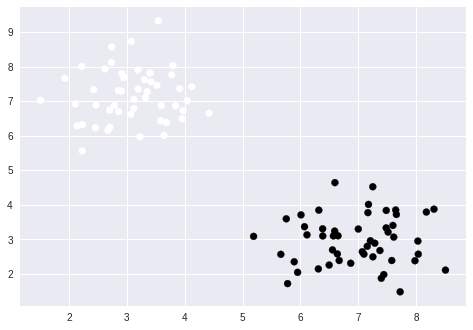

In [138]:
import numpy as np
import matplotlib.pyplot as plt

# Generate training dataset.
n = 50
centers = [[3, 7], [7, 3]]
covs = [[0.5, 0], [0, 0.5]]
coords = []
label_map = [-1, 1]
for cls, center in enumerate(centers):
  points = np.random.multivariate_normal(center, covs, n)
  labels = np.full((n, 1), label_map[cls])
  points = np.hstack([points, labels])
  coords.append(points)

coords = np.vstack(coords)
np.random.shuffle(coords)

plt.scatter(coords[:,0], coords[:,1], c=coords[:,2])

Now the implementation of the PLA algorithm.


Iteration: 1, loss: 100
Iteration: 2, loss: 0


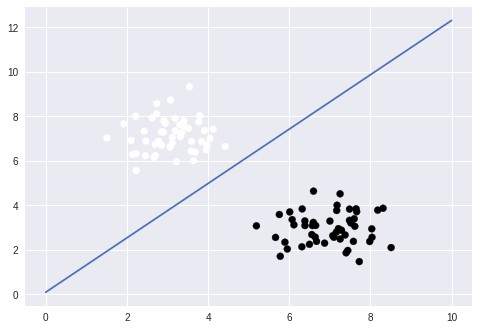

In [139]:
def PLA(D):
  # Divide the dataframe
  n = D.shape[0]
  d = D.shape[1] - 1
  x0 = np.full((n, 1), 1)
  X = np.hstack([x0, D[:,:-1]])
  y = D[:,-1]

  # Initialization w with 0
  w = np.zeros(d + 1)


  def indicator(t):
    return t and 1 or 0
  
  def h(x, w):
    return np.sign(np.matmul(x, w))

  max_loop = 1000
  loop = 0
  while loop < max_loop:
    loop += 1
            
    # Step 1: Calculate loss function E_in
    E = sum(
        [indicator(h(X[i], w) != y[i])
        for i in range(n)]
    )
    
    print('Iteration: %s, loss: %s' % (loop, E))

    if E == 0:
      return w


    # Step 2: Find a misclassified point and update w
    for i in range(n):
      y_ = h(X[i], w)
      if y_ != y[i]:
        w = w + y[i] * X[i]

w = PLA(coords)

plt.scatter(coords[:,0], coords[:,1], c=coords[:,2])

xx = np.linspace(0, 10)
yy = (w[0] + w[1] * xx) / -w[2]
plt.plot(xx, yy)